## Mubina Waheed CS-19110
## Samra Saleem CS-19103

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time
from tabulate import tabulate
from prettytable import PrettyTable
import warnings
warnings. filterwarnings('ignore')

In [2]:
data=pd.read_csv('The_Grades_Dataset.csv')

#### Deleting Seat No column because it does not affect CGPA

In [3]:
data.drop(['Seat No.'], axis=1, inplace=True)

#### encodes all grades into gpa


In [4]:

def encode(model):
    cols=model.columns
        
    for i in range(len(cols)-1):
        model[cols[i]]=model[cols[i]].replace(['A+','A-','A','B','B+','B-','C','C+','C-','D','D+','F','W','WU','I'],
                                              [4,3.7,4,3,3.3,2.7,2,2.3,1.7,1,1.3,0, 0,0,0])

In [5]:
#checks multicollinearity in each model

def check_multicolinearity(model_inputs):
    plt.figure(figsize=(18,11))
    sns.heatmap(model_inputs.corr(),  annot=True, annot_kws={"size": 14})
    sns.set_style('white')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

#### This function handles null values for each model

In [6]:
def check_null(model):
    model.isna().sum().sum()
    model.dropna(inplace=True)
    model.info()

## Pre-defined functions for algorithms 

#### The purpose of this fuction is to test determine best test-train split for the data


In [7]:
def LR_best_split(modelinputs, target):
    testsize=[0.1,0.2,0.25, 0.3, 0.35, 0.4,0.45,0.5,0.6,0.7]
    scores={}
    mse=[]
    for i in testsize:
        x_train, x_test, y_train, y_test=train_test_split(modelinputs, target,
                                                                             test_size=i, random_state=42)
        model_regr=LinearRegression()
        model_regr.fit(x_train, y_train)
        ypred=model_regr.predict(x_test)
        print("\nAt test size = ", i)
        t1=round(model_regr.score(x_train, y_train),3)
        t2=round(model_regr.score(x_test, y_test),3)
        mse.append(round(mean_squared_error(y_test, ypred),3))
        scores[i]=[t1,t2]
        print("training score:", t1, end='')
        print("| testing score:", t2, end='')
        print('| mean squared error: ', round(mean_squared_error(y_test, ypred),4))
    plt.plot(testsize, mse)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)


#### The purpose of this fuction is to test Regression on higher degrees

In [8]:
def PolyNomial_Reg(xtrain, xtest, ytrain, deg):
    
    Xtrain_poly =pd.DataFrame(PolynomialFeatures(degree=deg).fit_transform(xtrain))
    Xtest_poly =pd.DataFrame(PolynomialFeatures(degree=deg).fit_transform(xtest))
    
    Xtrain_poly=Xtrain_poly.drop([0], axis=1)
    Xtest_poly=Xtest_poly.drop([0], axis=1)
    
    model_poly=LinearRegression()
    model_poly.fit(Xtrain_poly,ytrain)
    ypred_poly=model_poly.predict(Xtest_poly)

    return model_poly, Xtrain_poly, Xtest_poly, ypred_poly

#### This function is used to test polynomial regression on test inputs 

In [9]:
def check_extreme_poly(poly, deg):
    test=np.full((1,11),4)
    test_poly=pd.DataFrame(PolynomialFeatures(degree=deg).fit_transform(test))
    test_poly=test_poly.drop([0], axis=1)
    print("\npredicting cgpa using 4 gpa in all courses:", end='')
    return poly.predict(test_poly)

#### Reusable function for applying random forest

In [10]:
def random_forest(xtrain, ytrain,xtest):
    rand_forest=RandomForestRegressor()
    rand_forest.fit(xtrain, ytrain)
    y_pred=rand_forest.predict(xtest)
    return rand_forest, y_pred

#### Reusable function for applying KNN

In [11]:
def KNN(n, xtrain, xtest, ytrain):
    knn=KNeighborsRegressor(n_neighbors=n, weights='uniform', algorithm='auto', leaf_size=30, 
                        p=2, metric='minkowski', metric_params=None, n_jobs=None)
    knn.fit(xtrain, ytrain)
    kpred=knn.predict(xtest)

    return knn, kpred

#### Returns optimum value of K

In [12]:
def k_opt(xtrain, ytrain, xtest, ytest):
    global rmse
    rmse=[]
    for i in range(1, 30):
        knn_obj, kpred_value=KNN(i,xtrain,xtest,ytrain)
        mse_knn_model3=mean_squared_error(ytest, kpred_value)
        rmse.append(mse_knn_model3)

        print("At k=", i,"\nTrain score =", knn_obj.score(xtrain,ytrain), end='')
        print(" | Test Score =", knn_obj.score(xtest,ytest), end='')
        print(" | MSE:", mse_knn_model3)
        print()

#### This function is used to plot K against different values of MSE

In [13]:
def plot_k():
    x=np.arange(1,30)
    plt.figure(figsize=(8,6))
    plt.plot(x, rmse,  color='green', linewidth = 2, marker='o', markerfacecolor='red', markersize=5)
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.xlabel("Value of k", fontsize=15)
    plt.ylabel("mean square error",fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

#### Reusable function for applying Linear Regression

In [14]:
def LR_model(xtrain,ytrain,xtest):
    
    model1_regr=LinearRegression()
    model1_regr.fit(xtrain, ytrain)

    predicted=model1_regr.predict(xtest)
    return model1_regr,predicted

## Histogram for target variable

Text(0.5, 0, 'CGPA')

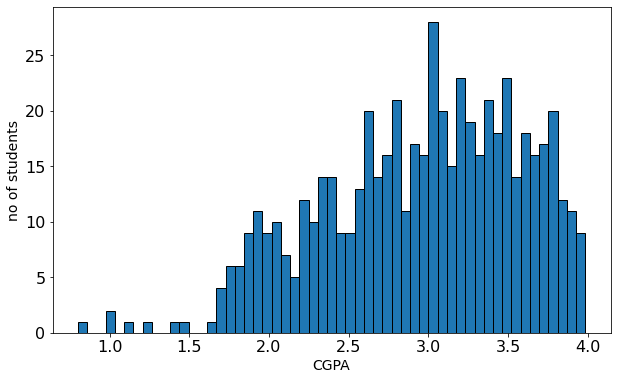

In [15]:
plt.figure(figsize=(10,6))
plt.hist(data["CGPA"], bins=55, ec='black')
plt.ylabel("no of students", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("CGPA", fontsize=14)

# Model 1: Only FE courses


### separating FE courses

In [16]:
model1=data.iloc[:, :11]
model1['CGPA']=data['CGPA']


### encoding data containing FE courses

In [17]:
encode(model1)
model1.head()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,1.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,3.3,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,2.7,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,1.0,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,2.0,3.448


### checking for multicolinearity

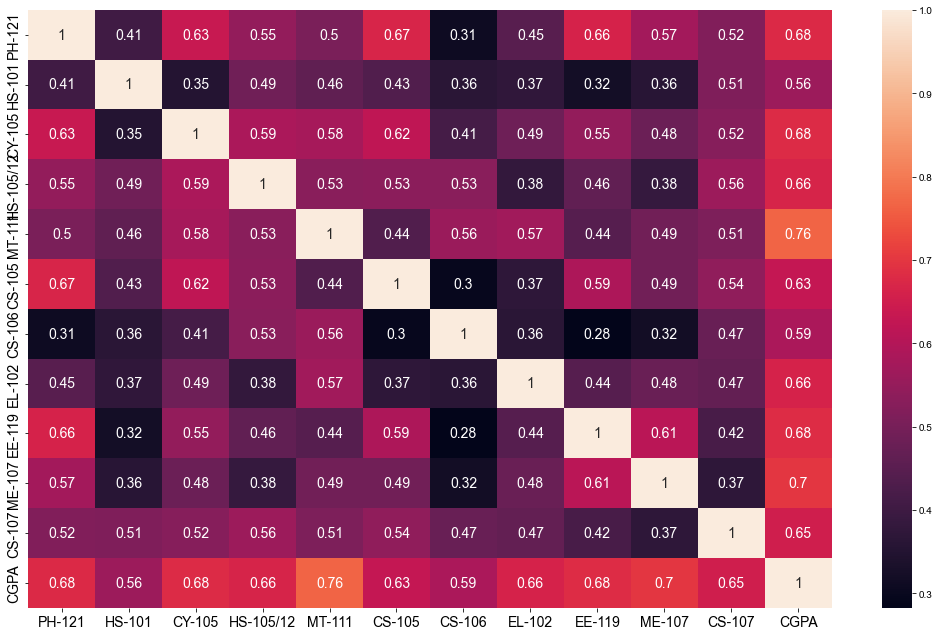

In [18]:
check_multicolinearity(model1)

### checking for null values

In [19]:
# model1.info()
check_null(model1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 570
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     566 non-null    float64
 1   HS-101     566 non-null    float64
 2   CY-105     566 non-null    float64
 3   HS-105/12  566 non-null    float64
 4   MT-111     566 non-null    float64
 5   CS-105     566 non-null    float64
 6   CS-106     566 non-null    float64
 7   EL-102     566 non-null    float64
 8   EE-119     566 non-null    float64
 9   ME-107     566 non-null    float64
 10  CS-107     566 non-null    float64
 11  CGPA       566 non-null    float64
dtypes: float64(12)
memory usage: 57.5 KB


### separating input and target variable

In [20]:
model1_inputs=model1.drop('CGPA', axis=1)
model1_target=model1['CGPA']


## Algorithm 1: Applying Linear regression

#### Train test split: Checking R-score on different proportions of train test split


At test size =  0.1
training score: 0.851| testing score: 0.865| mean squared error:  0.055

At test size =  0.2
training score: 0.86| testing score: 0.823| mean squared error:  0.0621

At test size =  0.25
training score: 0.864| testing score: 0.817| mean squared error:  0.0671

At test size =  0.3
training score: 0.863| testing score: 0.828| mean squared error:  0.0633

At test size =  0.35
training score: 0.855| testing score: 0.847| mean squared error:  0.0583

At test size =  0.4
training score: 0.856| testing score: 0.844| mean squared error:  0.0623

At test size =  0.45
training score: 0.85| testing score: 0.848| mean squared error:  0.0605

At test size =  0.5
training score: 0.854| testing score: 0.841| mean squared error:  0.0626

At test size =  0.6
training score: 0.851| testing score: 0.843| mean squared error:  0.0613

At test size =  0.7
training score: 0.863| testing score: 0.844| mean squared error:  0.0602


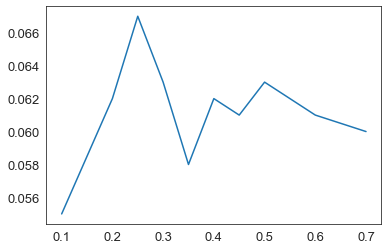

In [21]:
LR_best_split(model1_inputs, model1_target)

In [22]:
x_train_model1, x_test_model1, y_train_model1, y_test_model1=train_test_split(model1_inputs, model1_target,test_size=0.1, random_state=42)


#### Applying Linear Regression Model 1

In [23]:
fe_model, pred = LR_model(x_train_model1,y_train_model1,x_test_model1)

lr_train_score_model1=fe_model.score(x_train_model1,y_train_model1)
lr_test_score_model1=fe_model.score(x_test_model1,y_test_model1)

lr_MSE_model1=mean_squared_error(y_test_model1, fe_model.predict(x_test_model1))

### Applying Polynomial Regression

In [24]:

train_obj3, Xtrain_poly4,Xtest_poly4, poly4_predicted_value= PolyNomial_Reg(x_train_model1,x_test_model1,y_train_model1,4)
poly4_train_score_model1=train_obj3.score(Xtrain_poly4,y_train_model1)
poly4_test_score_model1=train_obj3.score(Xtest_poly4,y_test_model1)
poly4_MSE_model1=mean_squared_error(y_test_model1, poly4_predicted_value)

train_obj1, Xtrain_poly3,Xtest_poly3, poly3_predicted_value = PolyNomial_Reg(x_train_model1,x_test_model1,y_train_model1,3)
poly3_train_score_model1 = train_obj1.score( Xtrain_poly3,y_train_model1)
poly3_test_score_model1 = train_obj1.score( Xtest_poly3,y_test_model1) 
poly3_MSE_model1  = mean_squared_error(y_test_model1, poly3_predicted_value)


train_obj2, Xtrain_poly2,Xtest_poly2, poly2_predicted_value = PolyNomial_Reg(x_train_model1,x_test_model1,y_train_model1,2)
poly2_train_score_model1 = train_obj2.score( Xtrain_poly2,y_train_model1)
poly2_test_score_model1 = train_obj2.score( Xtrain_poly2,y_train_model1)
poly2_MSE_model1 = mean_squared_error(y_test_model1, poly2_predicted_value)
 

#### Testing model on extreme condition

In [25]:
check_extreme_poly(train_obj2,2)


predicting cgpa using 4 gpa in all courses:

array([3.95157536])

## Algorithm 2: Random Forest

In [26]:
RF_obj, RF_pred_value=random_forest(x_train_model1,y_train_model1,x_test_model1)
RF_train_score_model1=RF_obj.score(x_train_model1,y_train_model1)
RF_test_score_model1=RF_obj.score(x_test_model1,y_test_model1)
RF_MSE_model1=mean_squared_error(y_test_model1, RF_pred_value)


## Algorithm 3: KNN Regressor

#### Determining optimal value of k

In [27]:
k_opt(x_train_model1,y_train_model1, x_test_model1, y_test_model1)

At k= 1 
Train score = 1.0 | Test Score = 0.7913029994418609 | MSE: 0.08495540350877194

At k= 2 
Train score = 0.9235560294531518 | Test Score = 0.8534756034071254 | MSE: 0.05964646929824561

At k= 3 
Train score = 0.9009583783281219 | Test Score = 0.8656211235749223 | MSE: 0.054702327485380106

At k= 4 
Train score = 0.8794307862086435 | Test Score = 0.8803667980182239 | MSE: 0.04869972697368421

At k= 5 
Train score = 0.8731332552564657 | Test Score = 0.8833082784622942 | MSE: 0.04750232280701754

At k= 6 
Train score = 0.8695223569133987 | Test Score = 0.8832992033621738 | MSE: 0.04750601705653023

At k= 7 
Train score = 0.8619890297413486 | Test Score = 0.8892203422943646 | MSE: 0.045095667382742594

At k= 8 
Train score = 0.8627576179091259 | Test Score = 0.8885827184128765 | MSE: 0.04535522834429825

At k= 9 
Train score = 0.8588134656409501 | Test Score = 0.8864816083578867 | MSE: 0.04621053844487764

At k= 10 
Train score = 0.8581142372976084 | Test Score = 0.8946209348660888 

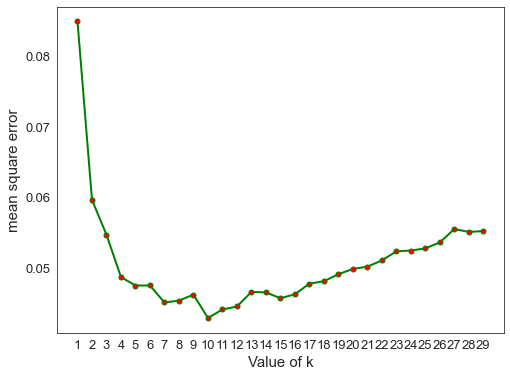

In [28]:
plot_k()

In [29]:
knn_obj_model1, knn_pred_value = KNN(10, x_train_model1,x_test_model1,y_train_model1)
knn_test_score_model1 = knn_obj_model1.score(x_train_model1, y_train_model1)
knn_train_score_model1 = knn_obj_model1.score(x_test_model1, y_test_model1)
mse_knn_model1 = mean_squared_error(y_test_model1, knn_pred_value)

## Tabular comparison of Accuracy of algorithms for first year courses

### Model 1

In [30]:
header = [
    "score type",
    "Linear regression",
    "Polynomial\n(degree=2)",
    "polynomial\n(degree=3)",
    "polynomial\n(degree=4)",
    "Knn Regressor",
    "Random Forest",
]
model1_scores = [
    [
        "train score",
        lr_train_score_model1,
        poly2_train_score_model1,
        poly3_train_score_model1,
        poly4_train_score_model1,
        knn_train_score_model1,
        RF_train_score_model1,
    ],
    [
        "test score",
        lr_test_score_model1,
        poly2_test_score_model1,
        poly3_test_score_model1,
        poly4_test_score_model1,
        knn_test_score_model1,
        RF_test_score_model1,
    ],
    [
        "Mean squared error",
        lr_MSE_model1,
        poly2_MSE_model1,
        poly3_MSE_model1,
        poly4_MSE_model1,
        mse_knn_model1,
        RF_MSE_model1,
    ],
]
table = tabulate(
    model1_scores, headers=header, tablefmt="fancy_grid", numalign="left"
)
# print('\033[1;3m' ,table, '\033[0m')
print(table)


╒════════════════════╤═════════════════════╤══════════════╤══════════════╤══════════════╤═════════════════╤═════════════════╕
│ score type         │ Linear regression   │ Polynomial   │ polynomial   │ polynomial   │ Knn Regressor   │ Random Forest   │
│                    │                     │ (degree=2)   │ (degree=3)   │ (degree=4)   │                 │                 │
╞════════════════════╪═════════════════════╪══════════════╪══════════════╪══════════════╪═════════════════╪═════════════════╡
│ train score        │ 0.851378            │ 0.899222     │ 0.977503     │ 1            │ 0.894621        │ 0.97727         │
├────────────────────┼─────────────────────┼──────────────┼──────────────┼──────────────┼─────────────────┼─────────────────┤
│ test score         │ 0.864795            │ 0.899222     │ -1.67697     │ -9.75148     │ 0.858114        │ 0.831166        │
├────────────────────┼─────────────────────┼──────────────┼──────────────┼──────────────┼─────────────────┼───────────

### Graphical comparison of Accuracy of models for first year courses

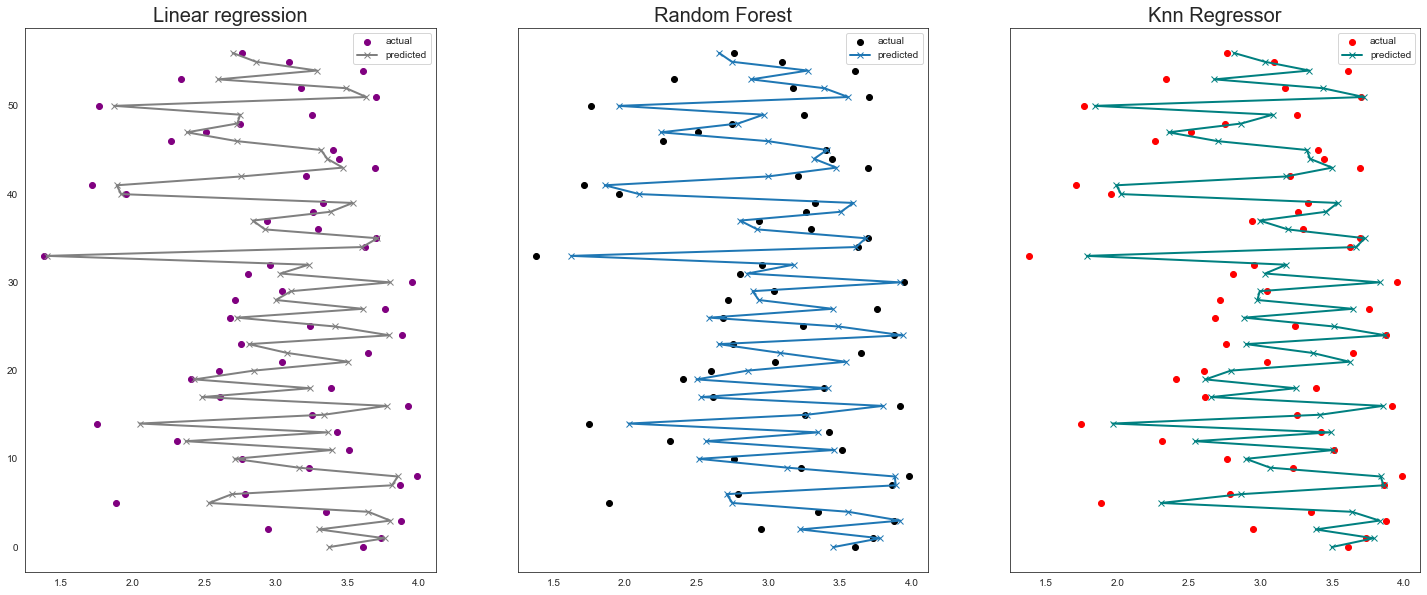

In [31]:

y = fe_model.predict(x_test_model1)
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, sharey=True, figsize=(25, 10))
axs1.scatter(
    y_test_model1.values, np.arange(len(y_test_model1)), label="actual", color="purple"
)
axs1.plot(
    y, np.arange(len(y)), label="predicted", color="grey", marker="x", linewidth=2.0
)
axs1.set_title("Linear regression", fontsize=20)
axs1.legend(loc="upper right")

r = RF_obj.predict(x_test_model1)
axs2.scatter(
    y_test_model1.values, np.arange(len(y_test_model1)), label="actual", color="black"
)
axs2.plot(r, np.arange(len(r)), label="predicted", marker="x", linewidth=2.0)

axs2.set_title("Random Forest", fontsize=20)
axs2.legend(loc="upper right")

k = knn_obj_model1.predict(x_test_model1)
axs3.scatter(
    y_test_model1.values, np.arange(len(y_test_model1)), label="actual", color="red"
)
axs3.plot(
    k, np.arange(len(k)), label="predicted", color="teal", marker="x", linewidth=2.0
)
axs3.set_title("Knn Regressor", fontsize=20)
axs3.legend(loc="upper right")



# MODEL:2 With FE and SE courses

In [32]:
model2=data.iloc[:, :22]
model2['CGPA']=data['CGPA']


### encoding categorical attributes

In [33]:
encode(model2)
model2.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,3.7,2.7,2.3,1.3,1.3,1.0,4.0,1.0,1.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.7,1.3,1.3,1.0,2.0,1.0,2.7,2.0,1.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,2.7,1.0,2.0,3.3,2.3,1.0,1.3,1.0,1.0,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7,3.448


### deleting rows that contain null values 

In [34]:
check_null(model2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 570
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     562 non-null    float64
 1   HS-101     562 non-null    float64
 2   CY-105     562 non-null    float64
 3   HS-105/12  562 non-null    float64
 4   MT-111     562 non-null    float64
 5   CS-105     562 non-null    float64
 6   CS-106     562 non-null    float64
 7   EL-102     562 non-null    float64
 8   EE-119     562 non-null    float64
 9   ME-107     562 non-null    float64
 10  CS-107     562 non-null    float64
 11  HS-205/20  562 non-null    float64
 12  MT-222     562 non-null    float64
 13  EE-222     562 non-null    float64
 14  MT-224     562 non-null    float64
 15  CS-210     562 non-null    float64
 16  CS-211     562 non-null    float64
 17  CS-203     562 non-null    float64
 18  CS-214     562 non-null    float64
 19  EE-217     562 non-null    float64
 20  CS-212    

### separating input and target variables

In [35]:
model2_inputs=model2.drop(['CGPA'], axis=1)
model2_target=model2['CGPA']

### checking for multicolinearity

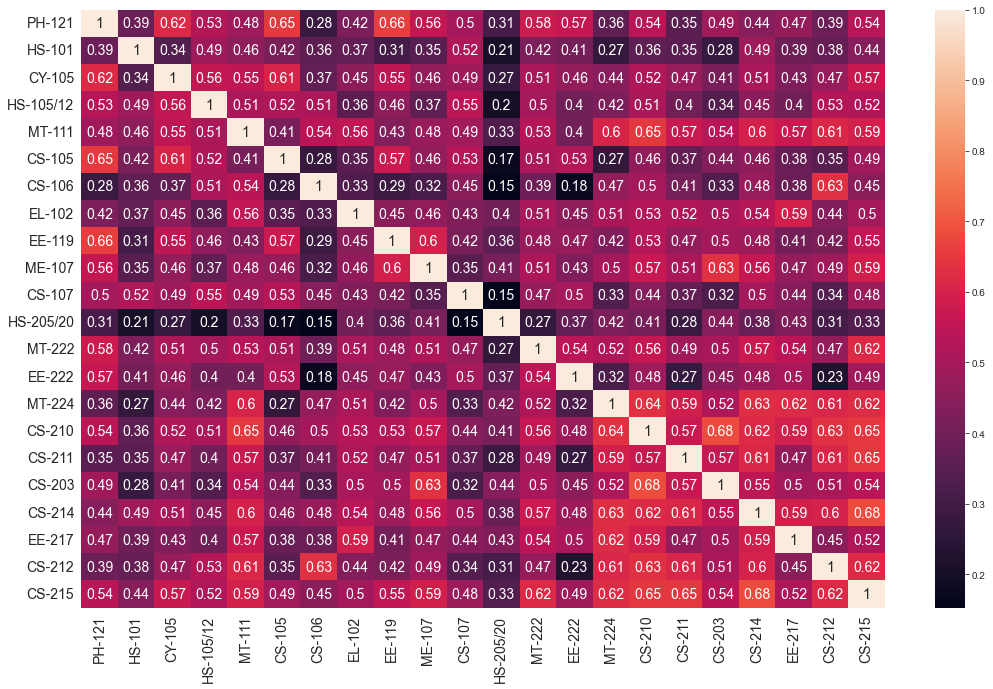

In [36]:
check_multicolinearity(model2_inputs)

# from the below heatmap we conclude that the chances of multicolinearity among 
# features are very low because the correlation between features is below 0.7 which is fairly acceptable

## Algorithm1: linear regression for deg=1

### separating training and testing data using best split



At test size =  0.1
training score: 0.948| testing score: 0.946| mean squared error:  0.0161

At test size =  0.2
training score: 0.949| testing score: 0.943| mean squared error:  0.0197

At test size =  0.25
training score: 0.95| testing score: 0.939| mean squared error:  0.0222

At test size =  0.3
training score: 0.954| testing score: 0.931| mean squared error:  0.0245

At test size =  0.35
training score: 0.955| testing score: 0.932| mean squared error:  0.0239

At test size =  0.4
training score: 0.953| testing score: 0.936| mean squared error:  0.023

At test size =  0.45
training score: 0.954| testing score: 0.937| mean squared error:  0.0227

At test size =  0.5
training score: 0.954| testing score: 0.936| mean squared error:  0.0226

At test size =  0.6
training score: 0.953| testing score: 0.939| mean squared error:  0.021

At test size =  0.7
training score: 0.958| testing score: 0.931| mean squared error:  0.0244


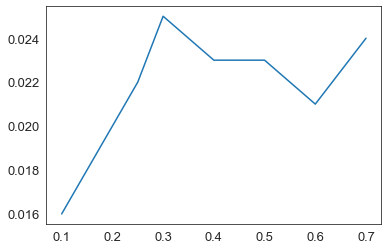

In [37]:
LR_best_split(model2_inputs, model2_target)

In [38]:
x_train_model2,x_test_model2,y_train_model2,y_test_model2 = train_test_split(model2_inputs,model2_target,
                                                                             test_size=0.1,random_state=42)

In [39]:
se_model, test = LR_model(x_train_model2, y_train_model2, x_test_model2)
lr_train_score_model2 = se_model.score(x_train_model2, y_train_model2)
lr_test_score_model2 = se_model.score(x_test_model2, y_test_model2)
lr_MSE_model2 = mean_squared_error(y_test_model2, se_model.predict(x_test_model2))


## Applying Polynomial Regression 

In [40]:
deg=[2,3,4,5]
poly_score_model2=[]
for i in deg:
    train_obj1_model2, Xtrain_poly4_m2, Xtest_poly4_m2, poly_predicted_value_m2 = PolyNomial_Reg(x_train_model2,x_test_model2, y_train_model2,i)
    train_Score_model2 = train_obj1_model2.score(Xtrain_poly4_m2,y_train_model2)
    test_Score_model2 = train_obj1_model2.score(Xtest_poly4_m2,y_test_model2)
    MSE_model2 = mean_squared_error(y_test_model2, poly_predicted_value_m2)
    
    poly_score_model2.append([ train_Score_model2, test_Score_model2, MSE_model2])



## Algorithm2: Random Forest Regressor

In [41]:
obj_RF, RF_predvalue_m2 = random_forest(x_train_model2,y_train_model2,x_test_model2)
RF_train_score_model2 = obj_RF.score(x_train_model2, y_train_model2)
RF_test_score_model2 = obj_RF.score(x_test_model2, y_test_model2)
RF_MSE_model2 = mean_squared_error(y_test_model2, RF_predvalue_m2)
print("\npredicted cgpa on test inputs: ", end='')
print(obj_RF.predict([[4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]]))


predicted cgpa on test inputs: [3.94814]


## Algorithm 3: KNN

In [42]:
k_opt(x_train_model2,y_train_model2, x_test_model2, y_test_model2)

At k= 1 
Train score = 1.0 | Test Score = 0.8057766609640257 | MSE: 0.057623245614035076

At k= 2 
Train score = 0.9672197568762974 | Test Score = 0.8931110677820595 | MSE: 0.031712394736842106

At k= 3 
Train score = 0.9511522943738184 | Test Score = 0.913227746233904 | MSE: 0.025744068226120857

At k= 4 
Train score = 0.9432169731177232 | Test Score = 0.9209388302058821 | MSE: 0.02345630153508771

At k= 5 
Train score = 0.9398763957227603 | Test Score = 0.9223338420992732 | MSE: 0.02304242175438595

At k= 6 
Train score = 0.937013387089242 | Test Score = 0.9257637980569916 | MSE: 0.02202480360623783

At k= 7 
Train score = 0.9354367387973316 | Test Score = 0.9259850773889086 | MSE: 0.021959153240243466

At k= 8 
Train score = 0.9324165259821398 | Test Score = 0.9293249185868715 | MSE: 0.020968270833333323

At k= 9 
Train score = 0.9319443212423145 | Test Score = 0.9293433668968059 | MSE: 0.020962797487546016

At k= 10 
Train score = 0.9306634622868276 | Test Score = 0.931088376061617

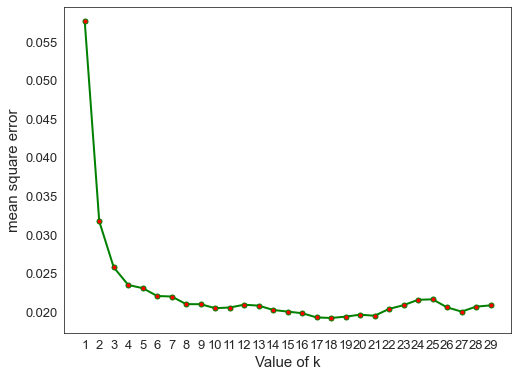

In [43]:
plot_k()

In [44]:
test=np.full((1,22),4)

knn_obj_model2, kpred_value_m2 = KNN(21, x_train_model2,x_test_model2,y_train_model2)
knn_test_score_model2 = knn_obj_model2.score(x_test_model2,y_test_model2)
knn_train_score_model2 = knn_obj_model2.score(x_train_model2,y_train_model2)
mse_knn_model2 = mean_squared_error(y_test_model2, kpred_value_m2)
print("Predicted cgpa on test input:", knn_obj_model2.predict(test))

Predicted cgpa on test input: [3.863]


In [45]:
print("MODEL-2 RESULT")
header = [
    "score",
    "Linear regression",
    "Polynomial2",
    "polynomial3",
    "polynomial4",
    "polynomial5",
    "Knn",
    "Random Forest",
]
model2_scores = [
    [
        "train",
        lr_train_score_model2,
        poly_score_model2[0][0],
        poly_score_model2[1][0],
        poly_score_model2[2][0],
        poly_score_model2[3][0],
        knn_train_score_model2,
        RF_train_score_model2,
    ],
    [
        "test",
        lr_test_score_model2,
        poly_score_model2[0][1],
        poly_score_model2[1][1],
        poly_score_model2[2][1],
        poly_score_model2[3][1],
        knn_test_score_model2,
        RF_test_score_model2,
    ],
    [
        "MSE",
        lr_MSE_model2,
        poly_score_model2[0][2],
        poly_score_model2[1][2],
        poly_score_model2[2][2],
        poly_score_model2[3][2],
        mse_knn_model2,
        RF_MSE_model2,
    ],
]
table = tabulate(
    model2_scores, headers=header, tablefmt="fancy_grid", stralign="center"
)
print(table)


MODEL-2 RESULT
╒═════════╤═════════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════╤═════════════════╕
│  score  │   Linear regression │   Polynomial2 │   polynomial3 │   polynomial4 │   polynomial5 │       Knn │   Random Forest │
╞═════════╪═════════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════╪═════════════════╡
│  train  │           0.948291  │     0.983462  │      1        │     1         │     1         │ 0.918818  │       0.988585  │
├─────────┼─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────┼─────────────────┤
│  test   │           0.945648  │     0.834644  │      0.564613 │     0.689454  │     0.712131  │ 0.934386  │       0.886397  │
├─────────┼─────────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────┼─────────────────┤
│   MSE   │           0.0161255 │     0.0490587 │      0.129173 │     0.0921344 │     0.0

# MODEL3: Including FE, SE and TE courses 

In [46]:
model3=data.iloc[:, :34]
model3['CGPA']=data['CGPA']
model3.drop('MT-442', axis=1, inplace=True)

### encoding categorical attributes 

In [47]:
encode(model3)
model3.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,2.3,3.0,2.0,2.3,2.0,1.7,2.0,1.7,1.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.7,3.7,1.3,1.7,2.0,3.7,1.0,1.3,1.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,4.0,3.3,3.7,3.0,3.3,3.7,3.7,3.0,3.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,2.7,1.0,2.7,1.3,1.3,3.3,1.7,1.3,2.0,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,3.7,2.7,3.7,2.3,3.7,2.7,3.7,2.7,3.3,3.448


### checking for null values

In [48]:
check_null(model3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 570
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     559 non-null    float64
 1   HS-101     559 non-null    float64
 2   CY-105     559 non-null    float64
 3   HS-105/12  559 non-null    float64
 4   MT-111     559 non-null    float64
 5   CS-105     559 non-null    float64
 6   CS-106     559 non-null    float64
 7   EL-102     559 non-null    float64
 8   EE-119     559 non-null    float64
 9   ME-107     559 non-null    float64
 10  CS-107     559 non-null    float64
 11  HS-205/20  559 non-null    float64
 12  MT-222     559 non-null    float64
 13  EE-222     559 non-null    float64
 14  MT-224     559 non-null    float64
 15  CS-210     559 non-null    float64
 16  CS-211     559 non-null    float64
 17  CS-203     559 non-null    float64
 18  CS-214     559 non-null    float64
 19  EE-217     559 non-null    float64
 20  CS-212    

#### separating input and target variables

In [49]:
model3_target=model3['CGPA']
model3_inputs=model3.drop('CGPA', axis=1)

#### checking multicollinearity

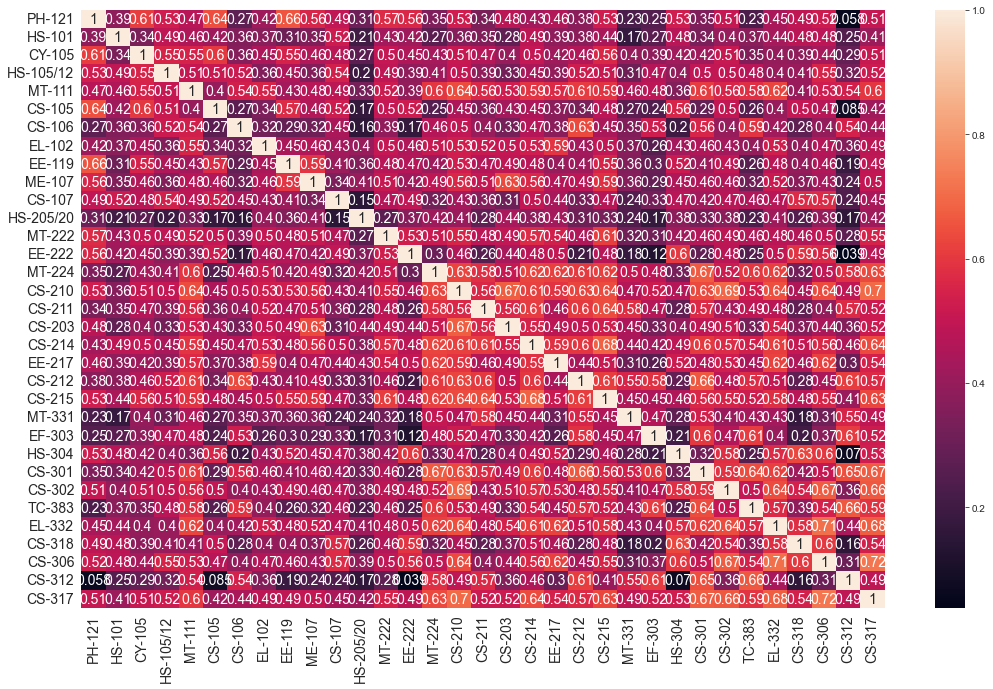

In [50]:
check_multicolinearity(model3_inputs)


## Algorithm-1: linear regression

#### Separating training and test data using best split


At test size =  0.1
training score: 0.991| testing score: 0.985| mean squared error:  0.0051

At test size =  0.2
training score: 0.991| testing score: 0.988| mean squared error:  0.0039

At test size =  0.25
training score: 0.991| testing score: 0.99| mean squared error:  0.0038

At test size =  0.3
training score: 0.991| testing score: 0.988| mean squared error:  0.0041

At test size =  0.35
training score: 0.991| testing score: 0.988| mean squared error:  0.0042

At test size =  0.4
training score: 0.993| testing score: 0.985| mean squared error:  0.0053

At test size =  0.45
training score: 0.994| testing score: 0.985| mean squared error:  0.005

At test size =  0.5
training score: 0.993| testing score: 0.986| mean squared error:  0.0049

At test size =  0.6
training score: 0.994| testing score: 0.986| mean squared error:  0.0045

At test size =  0.7
training score: 0.994| testing score: 0.987| mean squared error:  0.0046


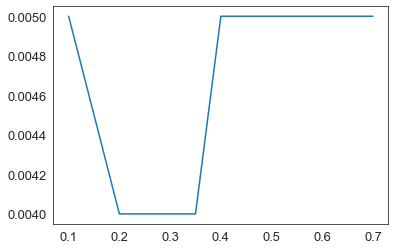

In [51]:
LR_best_split(model3_inputs, model3_target)

In [52]:
x_train_model3,x_test_model3,y_train_model3,y_test_model3 = train_test_split(model3_inputs,model3_target,test_size=0.2,
                                                                             random_state=42)


In [53]:
te_model,test=LR_model(x_train_model3,y_train_model3,x_test_model3)
ypred_model3=te_model.predict(x_test_model3)
lr_train_score_model3=te_model.score(x_train_model3,y_train_model3)
lr_test_score_model3=te_model.score(x_test_model3,y_test_model3)
lr_MSE_model3= mean_squared_error(y_test_model3, ypred_model3)

## Applying Polynomial regression 

In [54]:
degrees=[2,3,4]
poly_score_model3=[]

for i in degrees:
    
    train_obj1_model3, xtrain_poly_m3, xtest_poly_m3, pred_value_m3= PolyNomial_Reg(x_train_model3, x_test_model3,y_train_model3,i)
    train_Score_model3 = train_obj1_model3.score(xtrain_poly_m3,y_train_model3)
    test_Score_model3 = train_obj1_model3.score(xtest_poly_m3,y_test_model3)
    MSE_model3 = mean_squared_error(y_test_model3, pred_value_m3)
    
    poly_score_model3.append([ train_Score_model3, test_Score_model3, MSE_model3])

## Algorithm-2: KNN Regressor

#### finding optimum value of k

In [55]:
k_opt(x_train_model3,y_train_model3,x_test_model3,y_test_model3)

At k= 1 
Train score = 1.0 | Test Score = 0.8987338387059571 | MSE: 0.0333900625

At k= 2 
Train score = 0.9809817156670138 | Test Score = 0.9270467204957803 | MSE: 0.024054575892857137

At k= 3 
Train score = 0.9761134850062161 | Test Score = 0.9313355614636747 | MSE: 0.022640434523809528

At k= 4 
Train score = 0.9752480551438872 | Test Score = 0.9370525649281953 | MSE: 0.020755391183035713

At k= 5 
Train score = 0.9738763056676607 | Test Score = 0.9440879886502079 | MSE: 0.018435630714285712

At k= 6 
Train score = 0.9723993984902766 | Test Score = 0.9476286045970159 | MSE: 0.017268198412698405

At k= 7 
Train score = 0.9720621022659672 | Test Score = 0.9480012201526924 | MSE: 0.017145337463556853

At k= 8 
Train score = 0.9705614806926224 | Test Score = 0.9493285948403596 | MSE: 0.01670766782924107

At k= 9 
Train score = 0.9703128844488537 | Test Score = 0.9534842684017171 | MSE: 0.015337435185185192

At k= 10 
Train score = 0.9689126171843634 | Test Score = 0.9507556700167847 | 

#### plotting value of k against MSE to determine optimal value of k

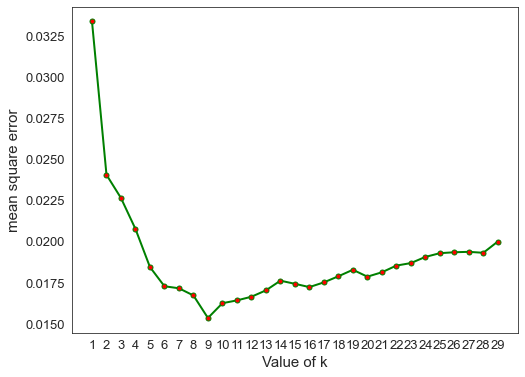

In [56]:
plot_k()

#### Predicting CGPA on test input

In [57]:
knn_obj_model3, kpred_value_m3 = KNN(9,x_train_model3,x_test_model3,y_train_model3)
knn_test_score_model3 = knn_obj_model3.score(x_train_model3,y_train_model3) 
knn_train_score_model3 = knn_obj_model3.score(x_test_model3,y_test_model3) 
mse_knn_model3 = mean_squared_error(y_test_model3,kpred_value_m3)
test=np.full((1,33),4)
print("predicting cgpa on test input: ", knn_obj_model3.predict(test))

predicting cgpa on test input:  [3.93011111]


## Algorithm-3 Random forest

In [58]:
obj_RF_3, RF_predvalue_m3 = random_forest(x_train_model3,y_train_model3,x_test_model3)
RF_train_score_model3 = obj_RF_3.score(x_train_model3,y_train_model3) 
RF_test_score_model3 = obj_RF_3.score(x_test_model3,y_test_model3) 
RF_MSE_model3 = mean_squared_error(y_test_model3,RF_predvalue_m3)
print("\npredicting cgpa on test input:", obj_RF_3.predict(test))


predicting cgpa on test input: [3.96299]


In [59]:
print("MODEL-3 RESULT")
header = [
    "score type",
    "Linear regression",
    "Polynomial:2",
    "polynomial:3",
    "polynomial:4",
    "Knn",
    "Random Forest",
]
model3_scores = [
    [
        "train",
        lr_train_score_model3,
        poly_score_model3[0][0],
        poly_score_model3[1][0],
        poly_score_model3[2][0],
        knn_train_score_model3,
        RF_train_score_model3,
    ],
    [
        "test",
        lr_test_score_model3,
        poly_score_model3[0][1],
        poly_score_model3[1][1],
        poly_score_model3[2][1],
        knn_test_score_model3,
        RF_test_score_model3,
    ],
    [
        "MSE",
        lr_MSE_model3,
        poly_score_model3[0][2],
        poly_score_model3[1][2],
        poly_score_model3[2][2],
        mse_knn_model3,
        RF_MSE_model3,
    ],
]
table = tabulate(
    model3_scores, headers=header, tablefmt="fancy_grid", stralign="center"
)
print(table)


MODEL-3 RESULT
╒══════════════╤═════════════════════╤════════════════╤════════════════╤════════════════╤═══════════╤═════════════════╕
│  score type  │   Linear regression │   Polynomial:2 │   polynomial:3 │   polynomial:4 │       Knn │   Random Forest │
╞══════════════╪═════════════════════╪════════════════╪════════════════╪════════════════╪═══════════╪═════════════════╡
│    train     │          0.991223   │      1         │      1         │      1         │ 0.953484  │       0.992946  │
├──────────────┼─────────────────────┼────────────────┼────────────────┼────────────────┼───────────┼─────────────────┤
│     test     │          0.988177   │      0.879522  │      0.949805  │      0.95306   │ 0.970313  │       0.952595  │
├──────────────┼─────────────────────┼────────────────┼────────────────┼────────────────┼───────────┼─────────────────┤
│     MSE      │          0.00389837 │      0.0397246 │      0.0165506 │      0.0154773 │ 0.0153374 │       0.0156307 │
╘══════════════╧═════════

# End of algorithms-- 

### Making predictions on user's input

In [60]:
def algos(model_inputs,model_target,grades,k,deg):
    
    LR_obj, pred_value=LR_model(model_inputs,model_target, grades)
    print("PREDICTED CGPA VIA LINEAR REGRESSION:",pred_value)

    Poly_obj, inputs_poly, grades_poly, P_pred = PolyNomial_Reg(model_inputs, grades, model_target,deg)
    print("PREDICTED CGPA VIA POLYNOMIAL REGRESSION DEGREE",deg, ":",P_pred)

    knn_obj, kpred_value=KNN(k, model_inputs,grades, model_target)
    print("PREDICTED CGPA VIA KNN:",kpred_value)

    RF_obj, RF_pred=random_forest(model_inputs, model_target,grades)
    print("PREDICTED CGPA VIA RANDOM FOREST:",RF_pred)


In [61]:
def inputs(model_cols, model1_inputs, model1_target,model2_inputs,model2_target, model3_inputs,model3_target):
    grades=[]
    valid_grades=['A+','A-','A','B','B+','B-','C','C+','C-','D','D+','F','W','WU','I']
    for i in range(len(model_cols)-1):
            
        print(model_cols[i], ": ", end='')
        n=input()
        while n not in valid_grades:
            print("Invalid grade try again")
            print(model_cols[i], ": ", end='')
            n=input()
        grades.append(n)
    print("\nObtained grades : ",grades)
    grades_=pd.DataFrame(grades)
    grades_['serial_No']=np.arange(len(model_cols)-1)
    encode(grades_)
    grades_=np.array(grades_[0])
    
    print("\n \nUSING FE COURSES\n")
    algos(model1_inputs,model1_target, [grades_[0:11]], 10,2)
    
    print("\n \nUSING FE AND SE COURSES\n")
    algos(model2_inputs, model2_target, [grades_[0:22]],21,2)
    
    print("\n \nUSING FE, SE, TE COURSES\n")
    algos(model3_inputs, model3_target, [grades_[0:33]], 9 ,4)


In [62]:
def main():
    model3_cols=model3.columns
    inputs(model3_cols,  model1_inputs, model1_target, model2_inputs,model2_target, model3_inputs,model3_target)

In [ ]:
main()

PH-121 : 